In [1]:
# Revenue per state, and relationship between order volume and revenue.
# This notebook analyses revenue per state, and the relationship between order volume and revenue

In [2]:
import pandas as pd
customers_df = pd.read_csv(r"C:\Users\YawOM\OneDrive\Desktop\Data Science\olist_customers_dataset.csv")
orders_df = pd.read_csv(r"C:\Users\YawOM\OneDrive\Desktop\Data Science\olist_orders_dataset.csv")
items_df = pd.read_csv(r"C:\Users\YawOM\OneDrive\Desktop\Data Science\olist_order_items_dataset.csv")
#Load in all the relevant data sets into the kernel

In [3]:
orders_df.columns, items_df.columns, customers_df.columns
# Identify column names so I have relevant info, primary keys, foreign keys, etc.

(Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'),
 Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city', 'customer_state'],
       dtype='object'))

In [4]:
cust_it_df = pd.merge(customers_df, orders_df, on = 'customer_id', how = "inner")
# Beginning of merged dataframe, produces a table where each row shows a customer that ordered something

In [5]:
cust_it_df.columns
# Get general sense of shape of dataframe

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [6]:
all_df = pd.merge(cust_it_df, items_df, on = "order_id", how = "inner")
# Completed dataframe, shows each individual item that was ordered by a customer

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [8]:
all_df["revenue"] = all_df["price"] + all_df["freight_value"]
# Calculate gross revenue

In [9]:
state_group = all_df.groupby(["customer_state"],)
# Group by state for our calculations

In [10]:
state_rev = state_group["revenue"].sum()
# Calculates the amount of revenue generated per state, and stores it in a variable

In [11]:
state_ord_num = state_group["order_id"].nunique()
# Calculates the sum of unique orders per state, and stores it in a variable.

In [12]:
state_df = pd.concat([state_rev, state_ord_num], axis = "columns", sort = False)
state_df.rename(columns = {"order_id": "order_num"}, inplace = True)
state_df
# Make a dataframe based on the variables earlier, with the states as an index, changed one of the column names to something more suitable.

,revenue,order_num
customer_state,,
AC,19669.70,81
AL,96229.40,411
AM,27835.73,147
AP,16262.80,68
BA,611506.67,3358
CE,275606.30,1327
DF,353229.44,2125
ES,324801.91,2025
GO,347706.93,2007


In [13]:
state_df.sort_values(by = "revenue", ascending = False)
# Sort values in the table by descending order, to calculate the states with the highest and lowest revenue

,revenue,order_num
customer_state,,
SP,5921678.12,41375
RJ,2129681.98,12762
MG,1856161.49,11544
RS,885826.76,5432
PR,800935.44,4998
BA,611506.67,3358
SC,610213.60,3612
DF,353229.44,2125
GO,347706.93,2007


In [14]:
correlation = state_df['revenue'].corr(state_df['order_num'])
correlation
# Calculates correlation coeffecient of revenue and number of orders, showing a strong positive correlation.

np.float64(0.9985068666343534)

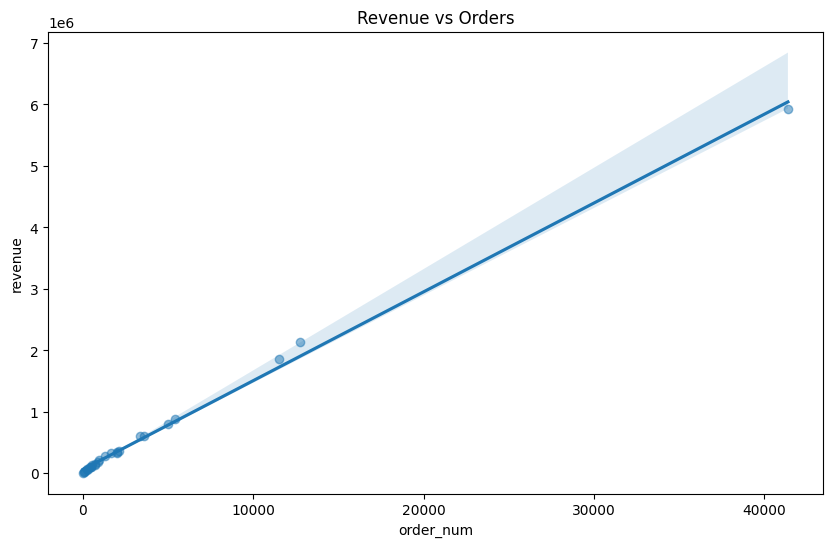

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=state_df, x='order_num', y='revenue', scatter_kws={'alpha':0.5})

plt.title('Revenue vs Orders')
plt.show()

# Draws a scatter graph with a line of best fit to show results

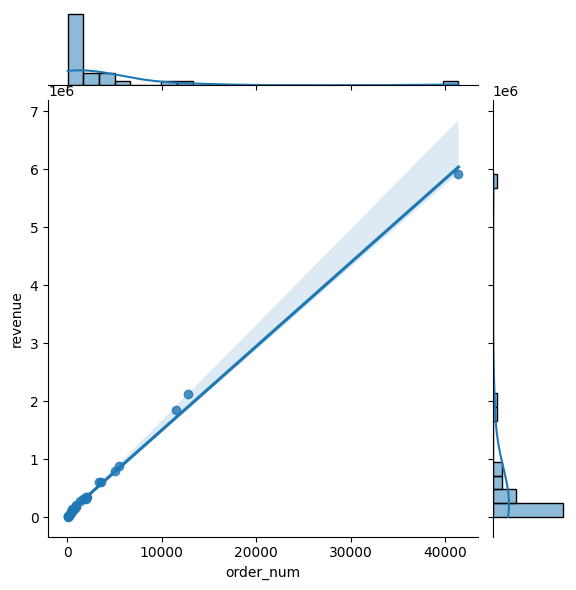

In [16]:
sns.jointplot(data=state_df, x='order_num', y='revenue', kind='reg', marginal_kws=dict(bins=25, fill=True))
plt.show()
# Adds histogram to further contextualise results

In [17]:
state_df.to_csv("C:/Users/YawOM/OneDrive/Desktop/Data Science/Brazillian_E-commerce_State_Dat")
# Save to specific file